# Exploración de los datos - Base obesidad

Para el desarrollo del proyecto, se realiza la exploración de los datos del dataset "Estimation of obseity level based on eating habits and physical condition" obtenida del repositorio UCI Machine Learning", mediante gráficos, información descriptiva y la aplicación de modelos no supervisados de clustering.

El conjunto de datos cuenta con las siguientes variables:

- **Genero**: Genero del individuo.
- **Age**: Edad del individuo.
- **Height**: Estatura del individuo.
- **Weight**: Peso del individuo.
- **family_history_with_overweight**: historial del sobrepeso en la familia del individuo.
- **FAVC**: ¿Come frecuentemente comidas con altas calorías? 
- **FCVC**: ¿Come frecuentemente vegetales con altas calorías? 
- **NCP**: ¿Cuántas comidas principales come a diario?
- **CAEC**: ¿Come algo entre comidas principales?
- **SMOKE**: ¿Usted fuma? 
- **CH2O**: ¿Cuánta agua consume diaríamente?
- **SCC**: ¿Usted moniteorea el número de calorías que ingiere en cada comida?
- **FAF**: ¿Cada cuánto realiza actividad física? 
- **TUE**: ¿Qué tan frecuente usa dispositivos electrónicos como celulares, tablets, videojuegos, televisiores, computadores u otros?
- **CALC**: ¿Cada cuánto consume alcohol?
- **MTRANS**: ¿Qué medio de transporte utiliza usualmente?
- **NObeseydad**: Nivel de obesidad del individuo.

Primero se cargan las librerías iniciales y el conjunto de datos

In [132]:
# Cargue de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

datos = pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")
datos.dtypes


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Con el fin de realizar esta primera descriptiva, se toman únicamente las variables cuantitativas del dataset, junto con la variable 'NObeyesdad' la cual define los niveles de obesidad.

In [133]:
numerical_columns = datos[["Age","Weight","Height", "FCVC", "NCP", "CH2O", "FAF","TUE","NObeyesdad"]]
numerical_columns.describe()


Age       Weight       Height         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600    86.586058     1.701677     2.419043     2.685628   
std       6.345968    26.191172     0.093305     0.533927     0.778039   
min      14.000000    39.000000     1.450000     1.000000     1.000000   
25%      19.947192    65.473343     1.630000     2.000000     2.658738   
50%      22.777890    83.000000     1.700499     2.385502     3.000000   
75%      26.000000   107.430682     1.768464     3.000000     3.000000   
max      61.000000   173.000000     1.980000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

En primera instancia, se busca definir qué tanta influencia tienen las variables Peso y Estatura sobre el nivel de obesidad del conjunto de datos. A priori se observa una notoria influencia de la variable peso en el agrupamiento de los datos.

<Axes: xlabel='Weight', ylabel='Height'>

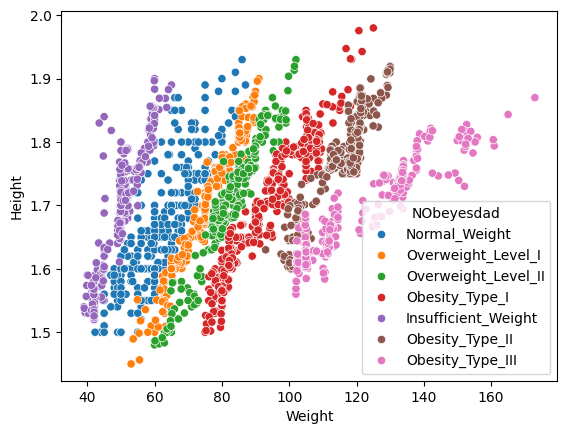

In [134]:
sns.scatterplot(data=numerical_columns,x='Weight',y='Height',hue='NObeyesdad')

Es notorio que los niveles más altos de obesidad estan determinados por un mayor peso, si bien la altura parece no tener una tendencia marcada, se sabe que el indíce de masa corporal es determinado por estas dos variables por lo que puede tener una influencia clara en los casos de obesidad, para validar el supuesto se crea la variable IMC. Adicionalmente, se transforma la variable 'NObeyesdad' en varaible numérica, asignando los siguientes valores:

- 0: Peso insuficiente.
- 1: Peso normal.
- 2: Nivel de sobrepeso I.
- 3: Nivel de sobrepeso II.
- 4: Nivel de obesidad I.
- 5: Nivel de obesidad II.
- 6: Nivel de obesidad III.

In [135]:
numerical_columns['IMC']=numerical_columns['Weight']/(numerical_columns['Height']**2)
#numerical_columns['obesidad_2']= numerical_columns['NObeyesdad'].map({'Normal_Weight': 0, 'Insufficient_Weight': 0, 'Overweight_Level_I':0,'Overweight_Level_II':0, 'Obesity_Type_I':1,'Obesity_Type_II':1, 'Obesity_Type_III':1})
numerical_columns['obesidad']= numerical_columns['NObeyesdad'].map({'Normal_Weight': 1, 'Insufficient_Weight': 0, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5, 'Obesity_Type_III':6})
numerical_columns=numerical_columns.drop('NObeyesdad',axis=1)
numerical_columns.head()


C:\Users\CARLOS MARIO\AppData\Local\Temp\ipykernel_10608\152672222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['IMC']=numerical_columns['Weight']/(numerical_columns['Height']**2)
C:\Users\CARLOS MARIO\AppData\Local\Temp\ipykernel_10608\152672222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['obesidad']= numerical_columns['NObeyesdad'].map({'Normal_Weight': 1, 'Insufficient_Weight': 0, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesit

Age  Weight  Height  FCVC  NCP  CH2O  FAF  TUE        IMC  obesidad
0  21.0    64.0    1.62   2.0  3.0   2.0  0.0  1.0  24.386526         1
1  21.0    56.0    1.52   3.0  3.0   3.0  3.0  0.0  24.238227         1
2  23.0    77.0    1.80   2.0  3.0   2.0  2.0  1.0  23.765432         1
3  27.0    87.0    1.80   3.0  3.0   2.0  2.0  0.0  26.851852         2
4  22.0    89.8    1.78   2.0  1.0   2.0  0.0  0.0  28.342381         3

In [136]:
numerical_columns.corr()

Age    Weight    Height      FCVC       NCP      CH2O  \
Age       1.000000  0.202560 -0.025958  0.016291 -0.043944 -0.045304   
Weight    0.202560  1.000000  0.463136  0.216125  0.107469  0.200575   
Height   -0.025958  0.463136  1.000000 -0.038121  0.243672  0.213376   
FCVC      0.016291  0.216125 -0.038121  1.000000  0.042216  0.068461   
NCP      -0.043944  0.107469  0.243672  0.042216  1.000000  0.057088   
CH2O     -0.045304  0.200575  0.213376  0.068461  0.057088  1.000000   
FAF      -0.144938 -0.051436  0.294709  0.019939  0.129504  0.167236   
TUE      -0.296931 -0.071561  0.051912 -0.101135  0.036326  0.011965   
IMC       0.244163  0.934806  0.131785  0.263651  0.039969  0.144200   
obesidad  0.282913  0.913251  0.133565  0.227759  0.026690  0.133008   

               FAF       TUE       IMC  obesidad  
Age      -0.144938 -0.296931  0.244163  0.282913  
Weight   -0.051436 -0.071561  0.934806  0.913251  
Height    0.294709  0.051912  0.131785  0.133565  
FCVC      0.019939 -0.101135  0.263651  0.227759  
NCP       0.129504  0.036326  0.039969  0.026690  
CH2O      0.167236  0.011965  0.144200  0.133008  
FAF       1.000000  0.058562 -0.177537 -0.199901  
TUE       0.058562  1.000000 -0.099720 -0.107991  
IMC      -0.177537 -0.099720  1.000000  0.977826  
obesidad -0.199901 -0.107991  0.977826  1.000000

Se aprecia que la correlación más alta con la variable 'obesidad' la tiene el peso  y el IMC el cual depende del peso y la estatura. Graficamente se puede ver en el siguiente gráfica. 

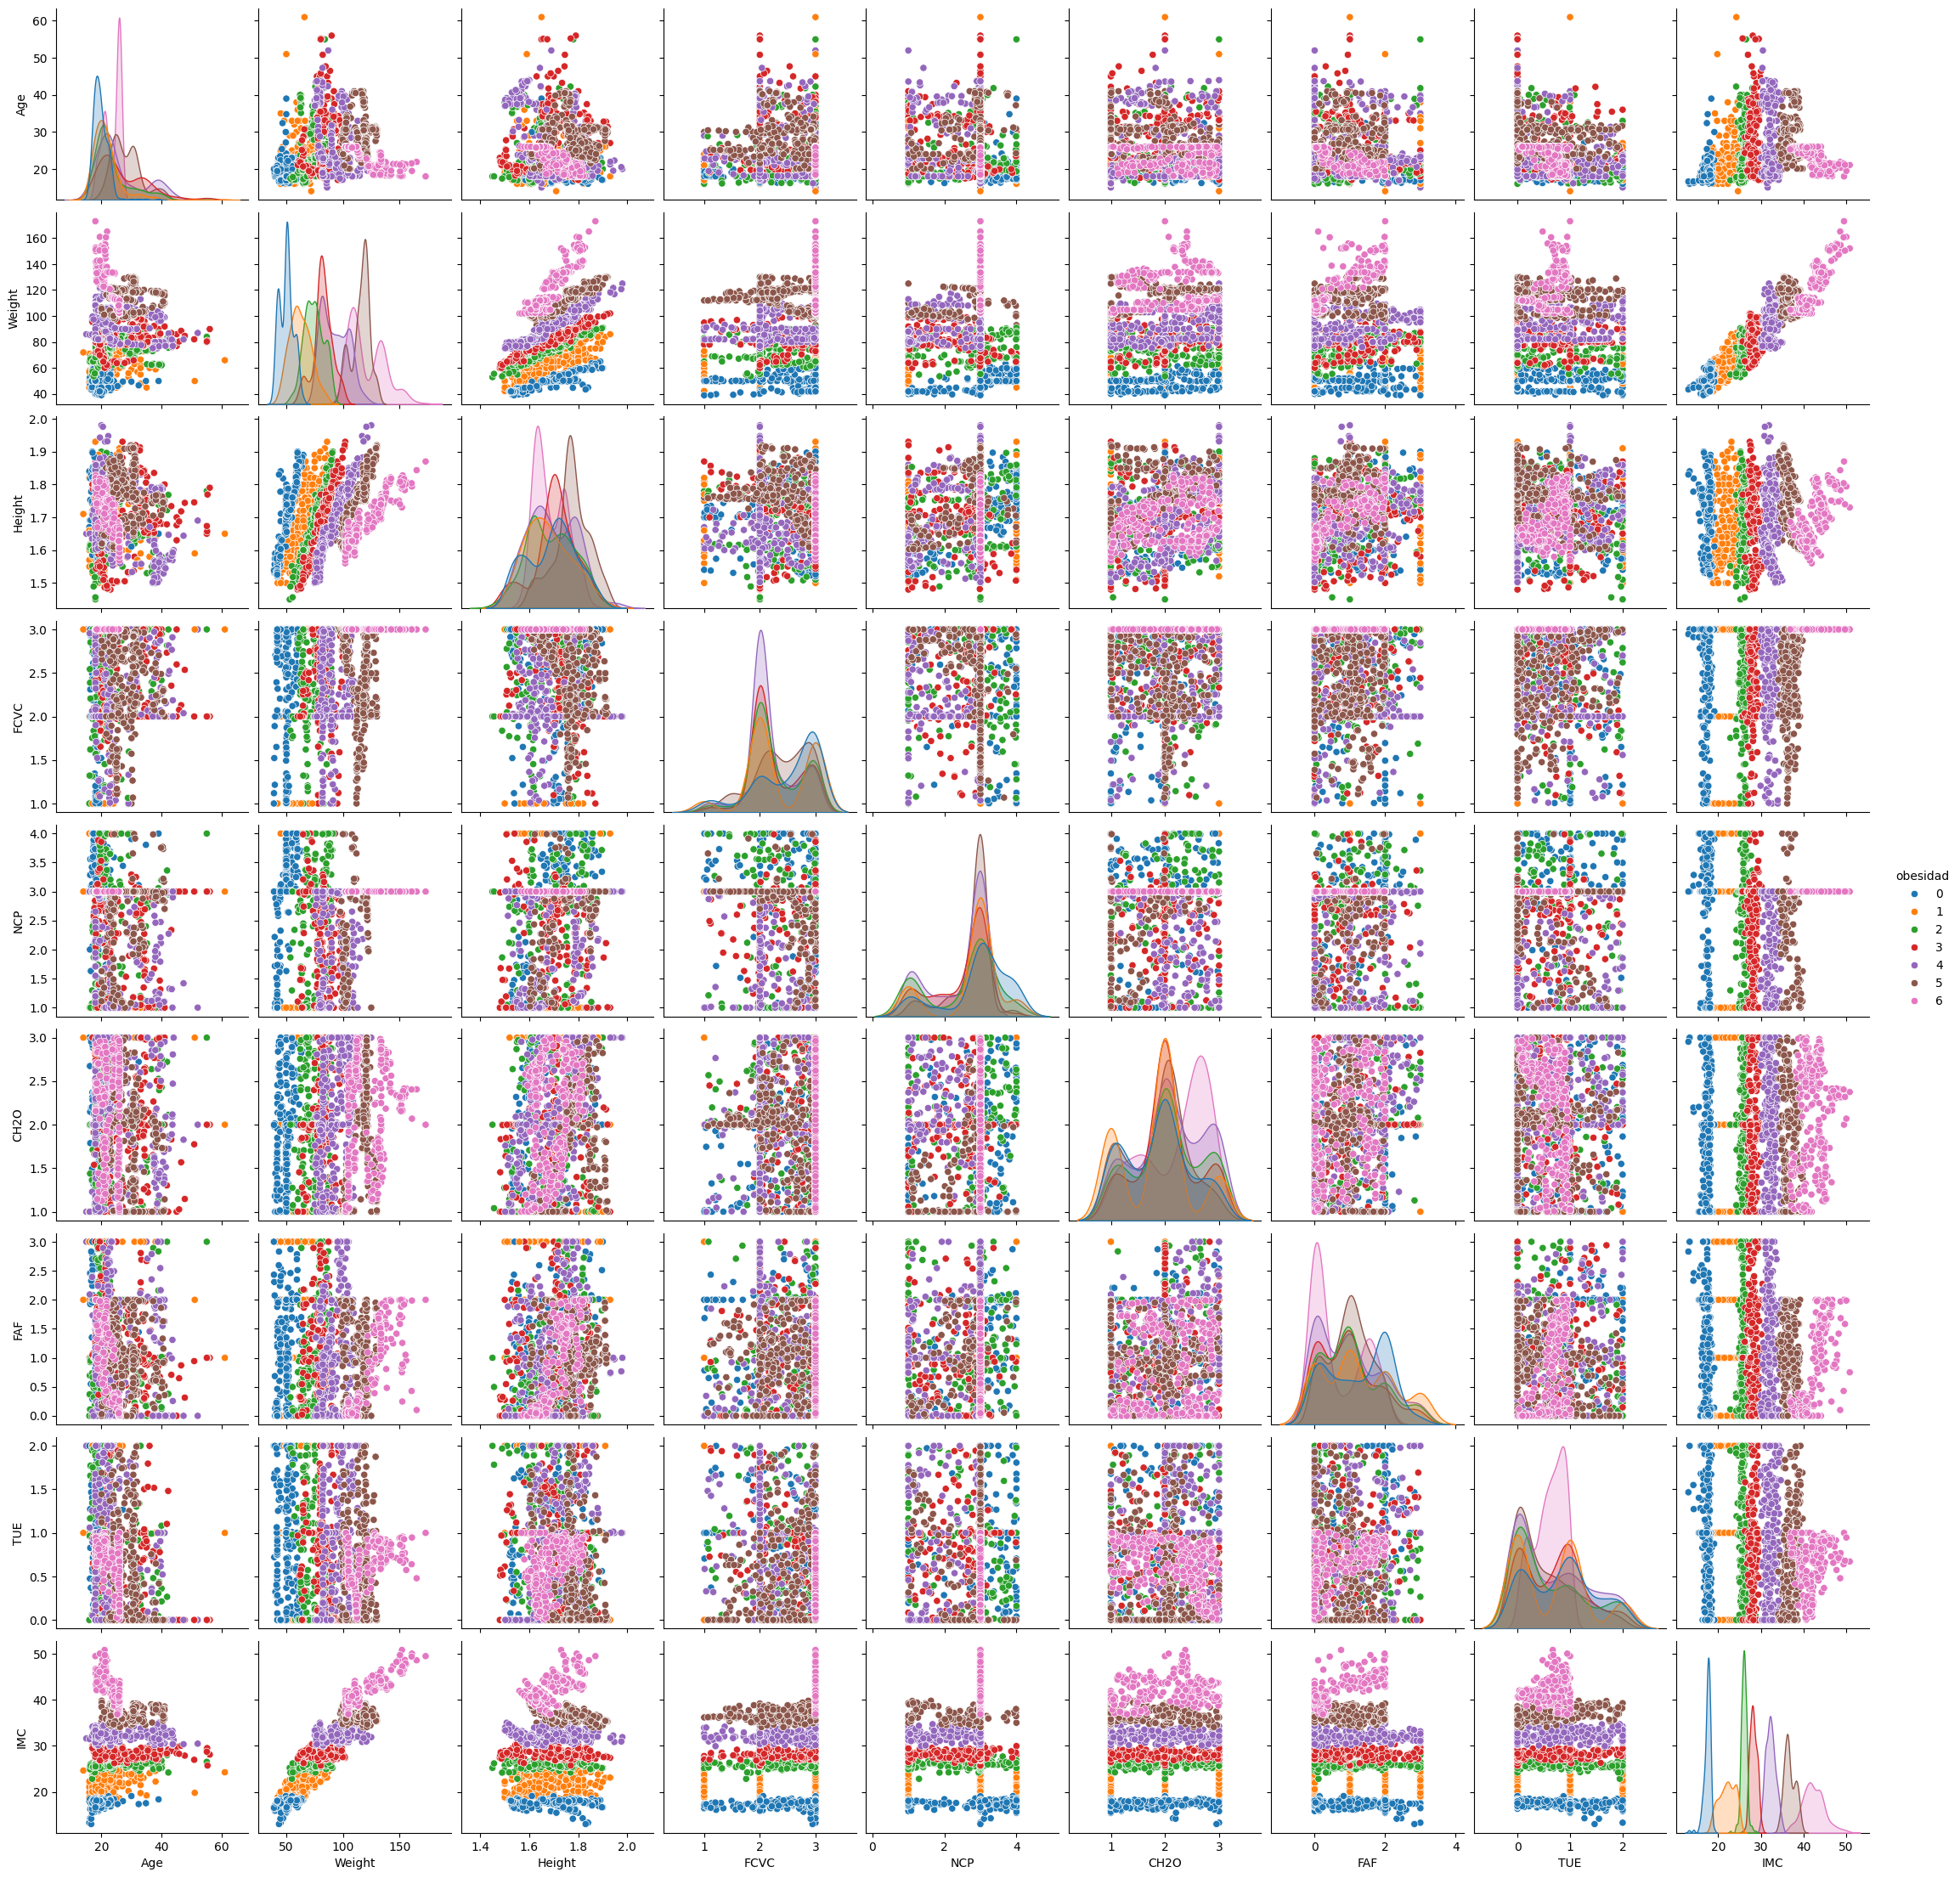

In [140]:
graphs=sns.pairplot(numerical_columns, hue='obesidad',diag_kind="kde", palette="tab10") 
graphs

Como se esperaba, la correlación más alta de la variable obesidad se encuentra con las variables IMC y Peso, si bien la correlación con la variable altura es débil pero su influencia en el IMC hace que los modelos a plantear puedan estar sesgados por estas variables, por esta razón se opta por excluirlas dentro del conjunto de datos.

Adicionalmente, se observa que para las demás variables no se observan patrones muy definidos, se cuenta con mayor variabilidad en la información respecto a la variable objetivo de obesidad. 

In [141]:
numerical_columns= numerical_columns.drop('Weight', axis=1)
numerical_columns= numerical_columns.drop('Height', axis=1)
numerical_columns= numerical_columns.drop('IMC', axis=1)

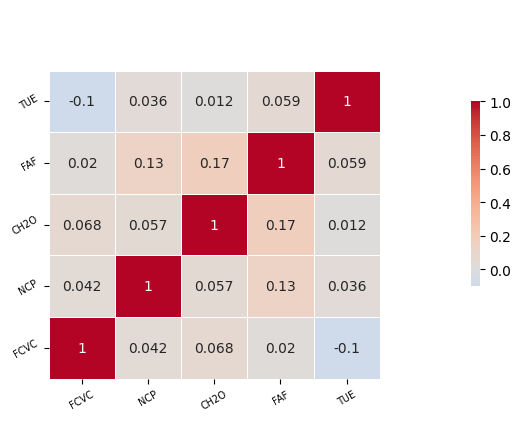

In [146]:
fig, ax = plt.subplots()
s=sns.heatmap(pd.DataFrame(data=numerical_columns[numerical_columns.columns[1:-1]]).corr(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,6)
ax.set_ylim(0,6)
plt.show()

# Clustering

Se quiere observar que caracterísiticas se pueden encontrar en el conjunto de datos utilizando unicamente las variables cuantitativas y excluyendo Peso y Estatura del data set. Para este ejercicio inicialmente se genera el dendograma jerárquico sobre el conjunto de datos.

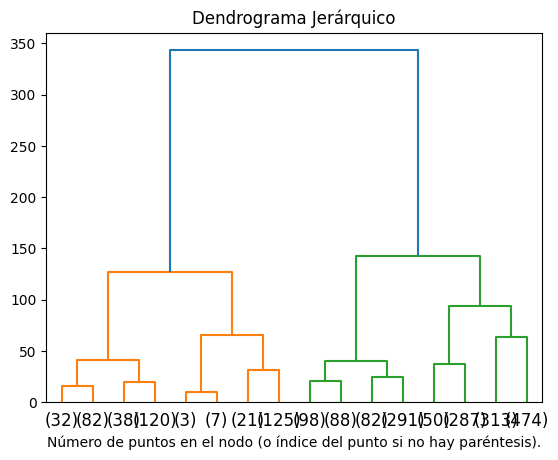

In [27]:
X=numerical_columns
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

def plot_dendrogram(model, **kwargs):
    # Crear el conteo de muestras bajo cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # es una hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Trazar el dendrograma correspondiente
    dendrogram(linkage_matrix, **kwargs)

# Trazar el dendrograma
plt.title('Dendrograma Jerárquico')
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice del punto si no hay paréntesis).")
plt.show()

Se puede identificar una separación marcada en dos grupos realizando un corte por debajo de 150, esto puede indicar que la distancia intracluster no sea alta pero si marcada. También se aprecia que en la agrupación de los puntos tuenda a haber cierta tendencia, encontrando el mayo conjunto de datos en el último clúster, donde 313 y 474 individuos parecen tener ciertas características similares, así mismo hay grupos donde apenas 7 y 3 individuos son agrupados por sus condiciones similares, si bien llama la atención el bajo número de registros, no son considerados como atípicos puesto que agrupados presentan similitud con el grupo naranja definido por el dendograma.



In [70]:
X= numerical_columns.drop("obesidad",axis=1)
#X= X.drop("obesidad_3",axis=1)
Y=numerical_columns[["obesidad"]]
X.head()

Age  FCVC  NCP  CH2O  FAF  TUE
0  21.0   2.0  3.0   2.0  0.0  1.0
1  21.0   3.0  3.0   3.0  3.0  0.0
2  23.0   2.0  3.0   2.0  2.0  1.0
3  27.0   3.0  3.0   2.0  2.0  0.0
4  22.0   2.0  1.0   2.0  0.0  0.0

In [86]:

# Reducir la dimensión utilizando PCA
#pca = PCA(n_components=3)
#X_pca = pca.fit_transform(X)
import prince
pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )

pca = pca.fit(X)

In [87]:
pca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.425        23.74%                     23.74%
1              1.201        20.02%                     43.76%
2              0.948        15.80%                     59.56%
3              0.936        15.61%                     75.17%
4              0.813        13.54%                     88.71%
5              0.677        11.29%                    100.00%

In [88]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)  

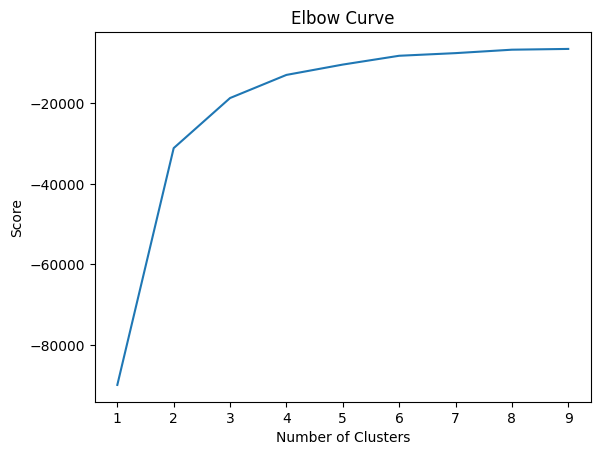

In [91]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Entre 4 clusters



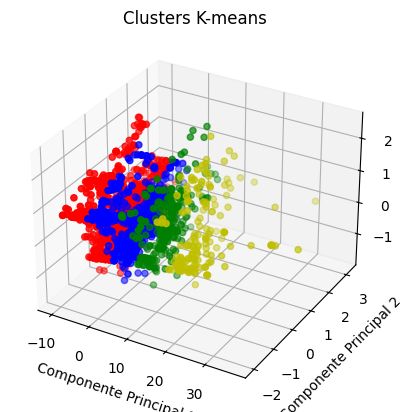

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']  # Colores para cada cluster

for label, color in zip(range(len(np.unique(labels))), colors):
    ax.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], X_pca[labels == label, 2], color=color)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clusters K-means')

plt.show()

In [107]:
kmeans = KMeans(n_clusters=4, random_state=30).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[31.3630727   2.38847213  2.62338251  1.85542482  0.97681474  0.50268345]
 [19.45598645  2.39722372  2.71160126  1.9938559   1.23289916  0.79080187]
 [24.34198963  2.47444548  2.69244103  2.11009693  0.78181056  0.64702888]
 [40.40421812  2.34076509  2.60955179  1.87816986  0.83275781  0.19872643]]


In [111]:

# Predicting the clusters
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
C
# Getting the cluster centers


array([[24.5406396 ,  2.48230527,  2.69110213,  2.11097381,  0.75412162,
         0.64049021],
       [19.58506613,  2.39598887,  2.71086705,  1.99863369,  1.23001766,
         0.78712878],
       [31.43942618,  2.38497592,  2.62444126,  1.85164117,  0.97987951,
         0.50316244],
       [40.40421812,  2.34076509,  2.60955179,  1.87816986,  0.83275781,
         0.19872643]])

In [110]:
import matplotlib.pyplot as plt

#reduced_data = PCA(n_components=4).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

InvalidIndexError: (slice(None, None, None), 0)